In [57]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [58]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

In [59]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

linear_model, dnn_model, lstm_model, df_all_chan,  input_columns  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

window_input_width = 200

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

history['lstm_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001, patience = 10)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Epoch 1/100
14/14 [==============================] - 1s 29ms/step - loss: 39.2793 - mean_absolute_error: 4.0193 - val_loss: 35.0473 - val_mean_absolute_error: 3.1848
Epoch 2/100
14/14 [==============================] - 0s 24ms/step - loss: 33.5743 - mean_absolute_error: 3.8893 - val_loss: 17.6262 - val_mean_absolute_error: 3.2661
Epoch 3/100
14/14 [==============================] - 0s 24ms/step - loss: 6.8161 - mean_absolute_error: 2.0230 - val_loss: 1.8072 - val_mean_absolute_error: 1.0947
Epoch 4/100
14/14 [==============================] - 0s 24ms/step - loss: 2.2660 - mean_absolute_error: 1.1584 - val_loss: 1.3628 - val_mean_absolute_error: 0.9507
Epoch 5/100
14/14 [==============================] - 0s 24ms/step - loss: 1.5674 - mean_absolute_error: 0.9863 - val_loss: 0.7937 - val_mean_absolute_error: 0.7026
Epoch 6/100
14/14 [==============================] - 0s 23ms/step - loss: 1.0613 - mean_absolute_error: 0.8024 - val_loss: 0.9267 - val_mean_absolute_error: 0.7252
Epoch 7/100


Text(0.5, 0, 'Epoch')

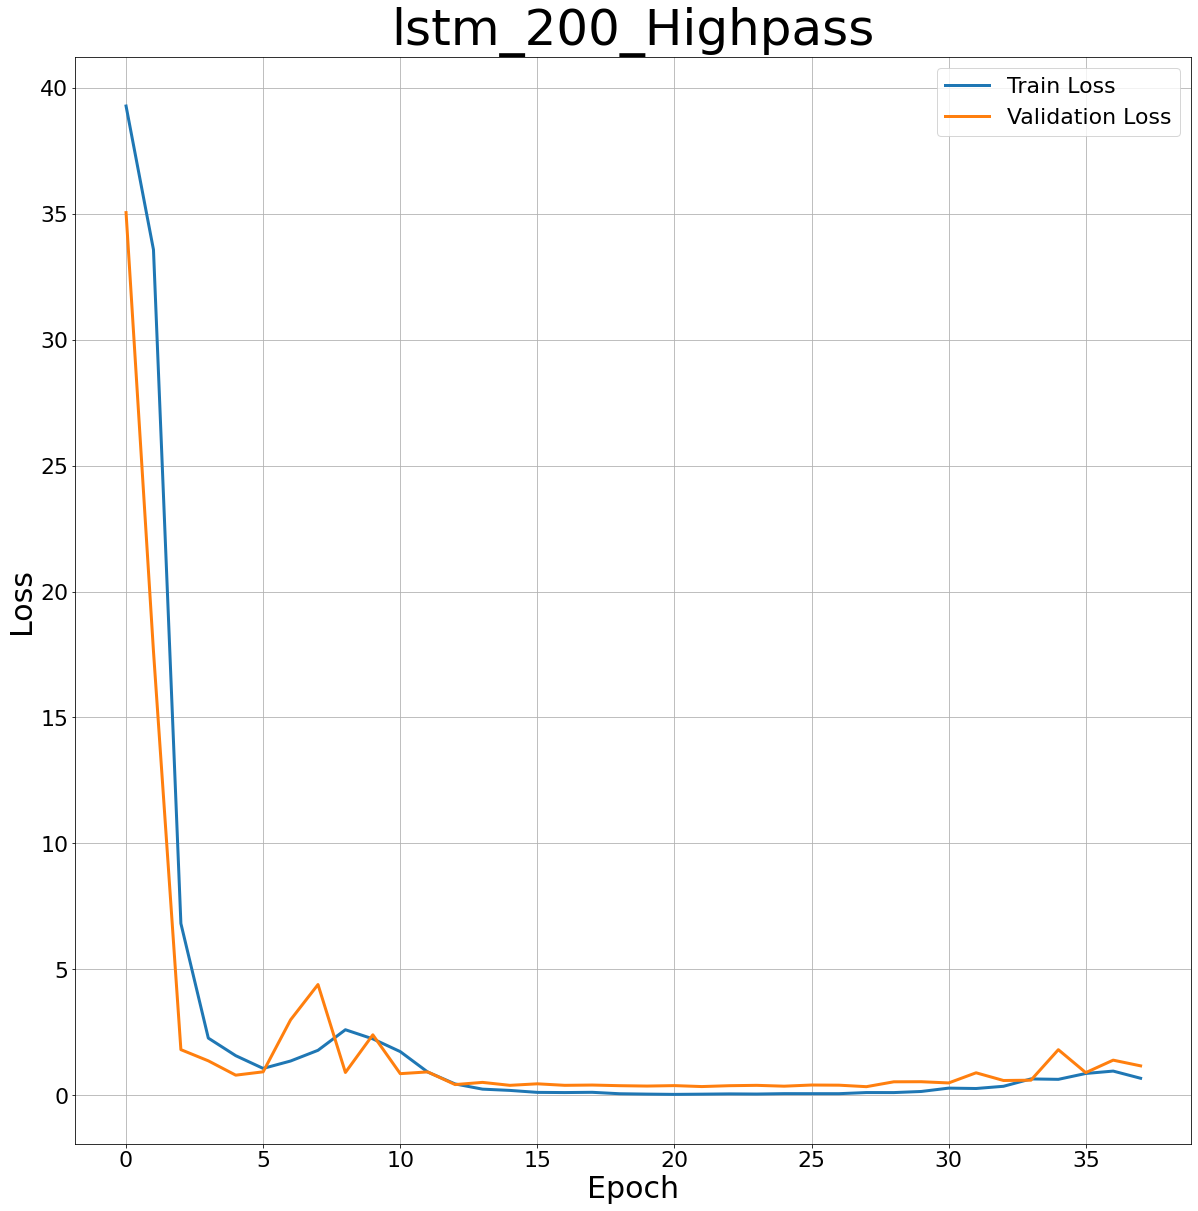

In [60]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(nrows=1, 
                         ncols=1, 
                         sharey=False, 
                         sharex=False,
                         figsize=(20,20))

fig.patch.set_facecolor('white')

ax.plot(history['lstm_'+str(window_input_width)+'_'+filt].history['loss'], label='Train Loss',linewidth=3)
ax.plot(history['lstm_'+str(window_input_width)+'_'+filt].history['val_loss'], label='Validation Loss',linewidth=3)
ax.grid(True)
ax.legend()
ax.set_title('lstm_'+str(window_input_width)+'_'+filt ,size=50)
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)

In [45]:
weights = lstm_model.layers[0].get_weights()[0]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0adf4c17f0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x7f0adf4c1f10>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x7f0adf4c1460>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x7f0adf324670>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0adf324a00>,
  ...],
 'means': []}

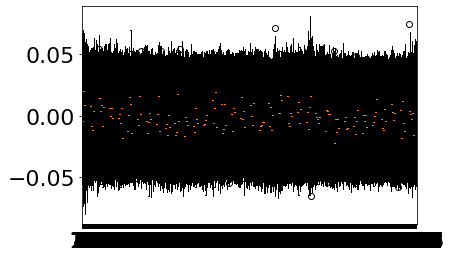

In [46]:
weights.shape

df_weights = pd.DataFrame(weights).transpose()

plt.boxplot(df_weights)
plt.show

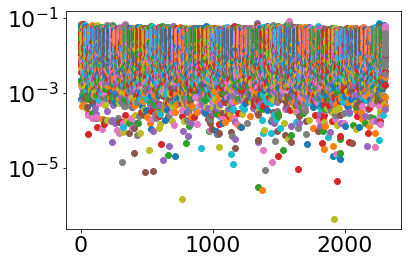

In [47]:
for col, i in zip(df_weights, list(range(0, 2308,1))):
    plt.scatter([i]*len(df_weights[col]), df_weights[col])

plt.yscale('log')

In [48]:
multi_step_window_no_shuffle = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=False)

/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [49]:
train_data = []
for i in multi_step_window_no_shuffle.train.as_numpy_iterator():
    train_data.append(i[0])

In [50]:
print(len(train_data))
train_data = np.asarray(train_data)

train_data = np.reshape(train_data, (train_data.shape[0]*train_data.shape[1], 200, 2308))

14


In [51]:
predictions = lstm_model.predict(train_data)

In [52]:
true_dis = []

for i in multi_step_window_no_shuffle.train.as_numpy_iterator():
    true_dis.append(i[1])

In [53]:
true_dis = np.asarray(true_dis)
true_dis = np.reshape(true_dis, (224, 1, 1))
true_dis

array([[[4.313518 ]],

       [[3.9296787]],

       [[3.7914457]],

       [[3.7385242]],

       [[3.5974214]],

       [[3.2125525]],

       [[3.7476685]],

       [[4.296447 ]],

       [[5.201219 ]],

       [[5.6238904]],

       [[6.68282  ]],

       [[6.4348307]],

       [[5.6197433]],

       [[4.813409 ]],

       [[4.4876857]],

       [[4.007274 ]],

       [[3.7561774]],

       [[3.6787975]],

       [[3.3822234]],

       [[3.1061418]],

       [[3.4200265]],

       [[3.960197 ]],

       [[4.849198 ]],

       [[5.853521 ]],

       [[6.010179 ]],

       [[5.627099 ]],

       [[4.8008633]],

       [[4.2947397]],

       [[3.930729 ]],

       [[3.7819068]],

       [[3.7136357]],

       [[3.3587253]],

       [[3.091512 ]],

       [[2.9346306]],

       [[2.835674 ]],

       [[2.8517644]],

       [[2.9655595]],

       [[3.0773287]],

       [[3.1293385]],

       [[3.1199574]],

       [[3.072399 ]],

       [[3.0334682]],

       [[3.0103066]],

       [[2.

In [54]:
predictions

array([[ 1.1655462 ],
       [ 0.7146051 ],
       [ 0.99975544],
       [ 0.19839272],
       [ 1.0036995 ],
       [ 0.7004088 ],
       [ 1.7667435 ],
       [ 1.5404425 ],
       [ 2.3757296 ],
       [ 2.2319033 ],
       [ 3.6584854 ],
       [ 1.1980546 ],
       [ 3.3861659 ],
       [ 1.6865395 ],
       [ 1.279143  ],
       [ 1.6209384 ],
       [ 1.0148101 ],
       [ 1.2766776 ],
       [ 0.75527614],
       [ 0.92467177],
       [ 1.0438067 ],
       [ 0.84417236],
       [ 1.0342923 ],
       [ 2.2775326 ],
       [ 2.053252  ],
       [ 2.1052258 ],
       [ 1.9677554 ],
       [ 1.9318818 ],
       [ 0.8908648 ],
       [ 0.82343864],
       [ 0.6288571 ],
       [ 0.7102897 ],
       [ 0.9006435 ],
       [ 0.35592532],
       [ 0.5997076 ],
       [ 1.4267942 ],
       [ 0.56168276],
       [ 1.8271923 ],
       [ 2.0570765 ],
       [-0.17233866],
       [ 1.2272649 ],
       [ 0.85079277],
       [ 0.48594004],
       [ 1.0747681 ],
       [ 0.8833407 ],
       [ 0

In [55]:
true_dis = true_dis.squeeze()

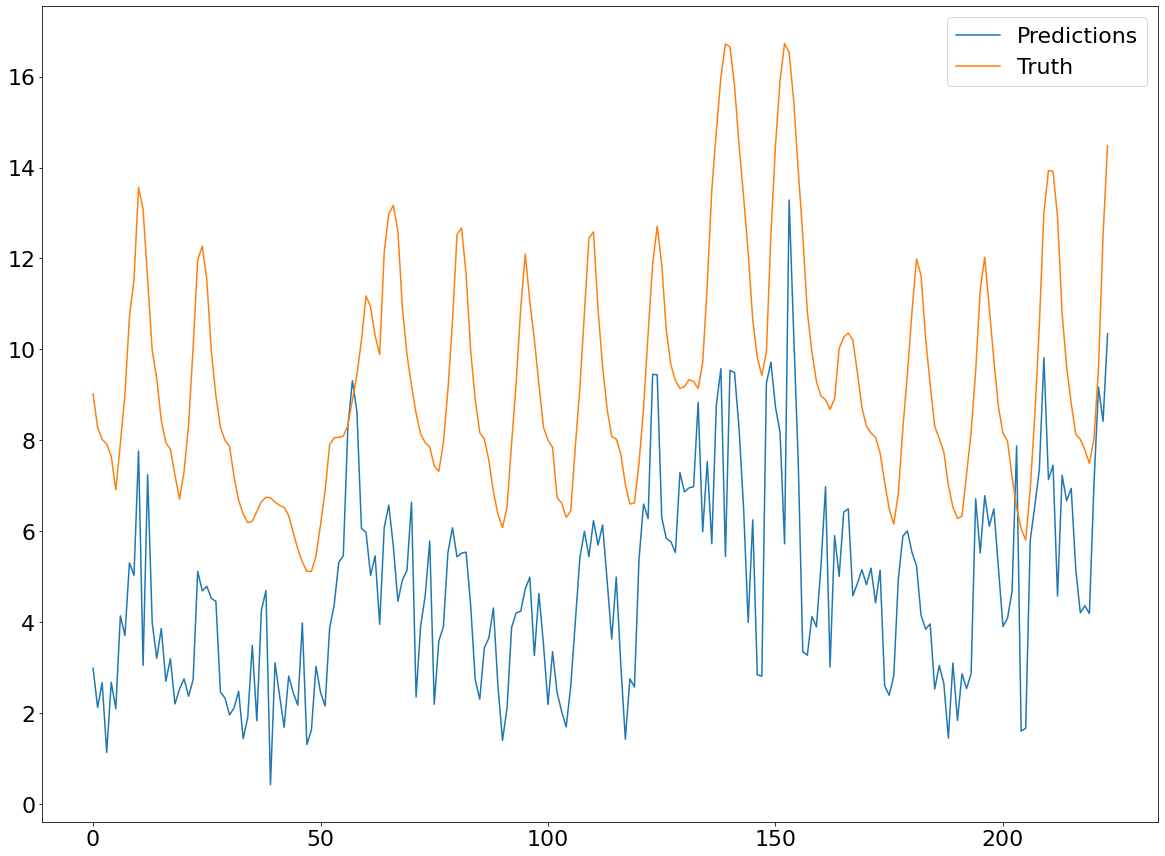

In [56]:
pred = (predictions * multi_step_window_no_shuffle.std_dis_mean)+multi_step_window_no_shuffle.train_dis_mean
true_discharge = (true_dis* multi_step_window_no_shuffle.std_dis_mean)+multi_step_window_no_shuffle.train_dis_mean

plt.figure(figsize = (20,15), facecolor = 'white')
plt.plot(pred, label = 'Predictions')
plt.plot(true_discharge, label = 'Truth')
plt.legend()